![cover](Malawi-News-Class.jpg)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder

from nltk.stem import WordNetLemmatizer

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import warnings

warnings.filterwarnings("ignore")


In [2]:
# read the datafile
train_data = pd.read_csv("./archive/Train.csv")
test_data = pd.read_csv("./archive/Test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(1436, 3)
(620, 2)


In [4]:
train_data.head(2)

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS


In [5]:
train_data.tail(2)

,ID,Text,Label
1434,ID_ztdsmmva,Tame Mwawa: Phwete ndiye kudya kwake Sewero l...,SOCIAL ISSUES
1435,ID_zteydTpN,PAC iunguza za boma la chifedulo Nthumwi zomw...,POLITICS


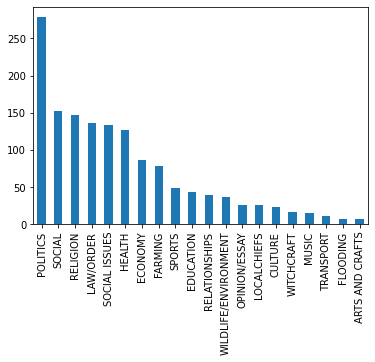

In [6]:
train_data.Label.value_counts().plot(kind='bar');

In [7]:
chichewa = ['i', 'ine', 'wanga', 'inenso', 'ife', 'athu', 'athu', 'tokha', 'inu', 'ndinu','iwe ukhoza', 'wako','wekha','nokha','iye','wake','iyemwini','icho','ndi','zake','lokha','iwo','awo','iwowo','chiyani','amene', 'uyu', 'uyo', 'awa', "ndili", 'ndi', 'ali','anali','khalani','akhala','kukhala',' Khalani nawo','wakhala','anali','chitani','amachita','kuchita', 'a', 'an', 'pulogalamu ya', 'ndi', 'koma', 'ngati', 'kapena', 'chifukwa', 'monga', 'mpaka', 'pamene', 'wa', 'pa ',' by','chifukwa' 'ndi','pafupi','kutsutsana','pakati','kupyola','nthawi', 'nthawi','kale','pambuyo','pamwamba', 'pansipa', 'kuti', 'kuchokera', 'mmwamba', 'pansi', 'mu', 'kunja', 'kuyatsa', 'kuchoka', 'kutha', 'kachiwiri', 'kupitilira','kenako',' kamodzi','apa','apo','liti','pati','bwanji','onse','aliyense','onse','aliyense', 'ochepa', 'zambiri', 'ambiri', 'ena', 'otero', 'ayi', 'kapena', 'osati', 'okha', 'eni', 'omwewo', 'kotero',' kuposa','nawonso',' kwambiri','angathe','ndidzatero','basi','musatero', 'musachite',' muyenera', 'muyenera kukhala','tsopano', 'sali', 'sindinathe','​​sanachite','satero','analibe', 'sanatero','sanachite','sindinatero','ayi','si', 'ma', 'sizingatheke','mwina','sayenera', 'osowa','osafunikira', 'shan' , 'nenani', 'sayenera', 'sanali', 'anapambana', 'sangachite', 'sanakonde', 'sangatero']

In [8]:
#cleaning texts
wn = WordNetLemmatizer()

def text_preprocessing(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [wn.lemmatize(word) for word in review if not word in chichewa]
    review = ' '.join(review)
    return review

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
train_data['Text'] = train_data['Text'].apply(text_preprocessing)
test_data['Text'] = test_data['Text'].apply(text_preprocessing)
print(train_data.head())
print(test_data.head())

            ID                                               Text      Label
0  ID_AASHwXxg  mwangonde khansala wachinyamata akamati achiny...   POLITICS
1  ID_AGoFySzn  mcp siidakhutire kalembera chipani cha malawi ...   POLITICS
2  ID_AGrrkBGP  bungwe la manepo lapempha boma liganizire anth...     HEALTH
3  ID_AIJeigeG  ndale zogawanitsa miyambo zanyanya zachilendon...   POLITICS
4  ID_APMprMbV  nanga wapolisi ataphofomoka masiku ano sichikh...  LAW/ORDER
            ID                                               Text
0  ID_ADHEtjTi  abambo odzikhweza akuchuluka kafukufuku apolis...
1  ID_AHfJktdQ  ambuye ziyaye ayamikira aphunzitsi tilitonse a...
2  ID_AUJIHpZr  anatcheleza akundiopseza gogo akundiopseza gog...
3  ID_AUKYBbIM  ulova wafika posauzana adatenga digiri ya uphu...
4  ID_AZnsVPEi  dzombe kukoma kuyambira makedzana panthawi ya ...


In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['Text']).toarray()
training = pd.DataFrame(X, columns=vectorizer.get_feature_names())
print(training.shape)

X_test_final = vectorizer.transform(test_data['Text']).toarray()
test_new = pd.DataFrame(X_test_final, columns=vectorizer.get_feature_names())
print(test_new.shape)

(1436, 49475)
(620, 49475)


In [14]:
training.head() #check first five rows

,aaa,aaaa,aaaaargh,aaah,aadati,aah,aakazi,aakazinso,aakulu,aakuluakulu,...,zutatu,zuwele,zuza,zuze,zuziwe,zvakanedza,zwelethini,zwelithini,zyoli,zzidamangidwa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X = training
y = train_data['Label']

In [16]:
label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [17]:
smote = SMOTE()
X, y_label = smote.fit_resample(X,y_label)
np.bincount(y_label)

array([279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279,
       279, 279, 279, 279, 279, 279, 279])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.1, random_state=0)

model = SGDClassifier(loss='hinge', 
                      alpha=4e-4, 
                      max_iter=20, 
                      verbose=False)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0004, max_iter=20, verbose=False)

In [19]:
pred = model.predict(X_test)
print("Train Accuracy Score:",round(model.score(X_train, y_train),2))
print("Test Accuracy Score:",round(accuracy_score(y_test, pred),2))

Train Accuracy Score: 0.99
Test Accuracy Score: 0.95


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       0.96      0.83      0.89        29
           3       0.96      1.00      0.98        22
           4       0.97      1.00      0.98        29
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        30
           7       0.88      0.93      0.90        30
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        37
          10       1.00      1.00      1.00        25
          11       0.90      0.75      0.82        24
          12       1.00      1.00      1.00        31
          13       0.77      0.96      0.86        25
          14       0.94      0.55      0.70        29
          15       0.90      1.00      0.95        19
          16       1.00      1.00      1.00        30
          17       0.94    

In [21]:
test_pred = label_encoder.inverse_transform(pred)
test_label = label_encoder.inverse_transform(y_test)
cf_matrix = confusion_matrix(test_pred, test_label)

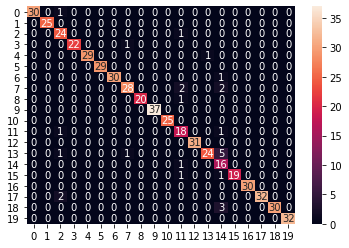

In [22]:
sns.heatmap(cf_matrix, annot=True);

In [23]:
# Preparing submission
sub_pred = model.predict(test_new)
submission = pd.DataFrame()
submission['ID'] = test_data['ID']
submission['Label'] = label_encoder.inverse_transform(sub_pred)
submission.to_csv('submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1bff48d4-9307-4057-89cf-2a097c21437e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>